In [1]:
pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
Note: you may need to restart the kernel to use updated packages.


In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [3]:
cd yolov5

C:\Users\a846864\Documents\solution_objection\yolov5


In [4]:
!pip install -r requirements.txt

In [5]:
#!cd & pip install -r requirements.txt

In [14]:
import torch
import matplotlib.pyplot as plt 
import numpy as np
import cv2

In [15]:
model=torch.hub.load("ultralytics/yolov5","yolov5s")

URLError: <urlopen error [WinError 10060] Une tentative de connexion a échoué car le parti connecté n’a pas répondu convenablement au-delà d’une certaine durée ou une connexion établie a échoué car l’hôte de connexion n’a pas répondu>

In [8]:
img = 'https://i.gaw.to/content/photos/38/40/384006_Vous_n_etes_pas_pris_dans_le_trafic.jpg'  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

image 1/1: 1200x1920 5 persons, 28 cars, 2 buss, 2 trucks
Speed: 3398.6ms pre-process, 437.6ms inference, 12.0ms NMS per image at shape (1, 3, 416, 640)


In [9]:
print(results.render())

[array([[[183, 183, 191],
        [182, 182, 190],
        [181, 181, 189],
        ...,
        [185, 185, 193],
        [185, 185, 195],
        [185, 185, 195]],

       [[183, 183, 191],
        [182, 182, 190],
        [181, 181, 189],
        ...,
        [187, 187, 195],
        [186, 186, 196],
        [185, 185, 195]],

       [[183, 183, 191],
        [183, 183, 191],
        [183, 183, 191],
        ...,
        [187, 187, 195],
        [185, 185, 195],
        [183, 183, 193]],

       ...,

       [[255, 112,  31],
        [255, 112,  31],
        [255, 112,  31],
        ...,
        [ 18,  27,  58],
        [  6,  15,  44],
        [  1,  11,  38]],

       [[255, 112,  31],
        [255, 112,  31],
        [255, 112,  31],
        ...,
        [ 17,  26,  57],
        [  6,  16,  43],
        [  2,  12,  39]],

       [[157, 139, 133],
        [125,  91,  73],
        [ 83,  50,  29],
        ...,
        [ 17,  26,  57],
        [ 10,  20,  47],
        [  7,  17,  44]

In [10]:
p_n=0


for i,el in enumerate(results.crop()):
  if el['label'].split(" ")[0] in ['person','car','bird','cat','dog','horse','sheep','cow']:
    print("bonjour")
    print(el['label'])
    p_n=p_n+1
    
    print(i)


print("nombre de personne ",p_n)
  

Saved 1 image to runs\detect\exp
Saved results to runs\detect\exp



bonjour
car 0.28
1
bonjour
person 0.28
2
bonjour
car 0.30
3
bonjour
car 0.31
4
bonjour
car 0.33
5
bonjour
car 0.34
6
bonjour
car 0.35
7
bonjour
person 0.35
8
bonjour
car 0.37
10
bonjour
car 0.38
11
bonjour
car 0.38
12
bonjour
car 0.40
13
bonjour
car 0.41
14
bonjour
car 0.41
15
bonjour
car 0.43
16
bonjour
car 0.44
17
bonjour
car 0.45
18
bonjour
car 0.45
19
bonjour
car 0.46
20
bonjour
car 0.48
21
bonjour
car 0.48
22
bonjour
car 0.53
23
bonjour
car 0.54
24
bonjour
person 0.58
25
bonjour
car 0.59
26
bonjour
car 0.63
27
bonjour
car 0.70
28
bonjour
car 0.72
29
bonjour
person 0.78
30
bonjour
car 0.78
31
bonjour
person 0.79
32
bonjour
car 0.81
34
bonjour
car 0.84
36
nombre de personne  33


In [11]:
results.crop()[0]['label']

Saved 1 image to runs\detect\exp2
Saved results to runs\detect\exp2



'truck 0.27'

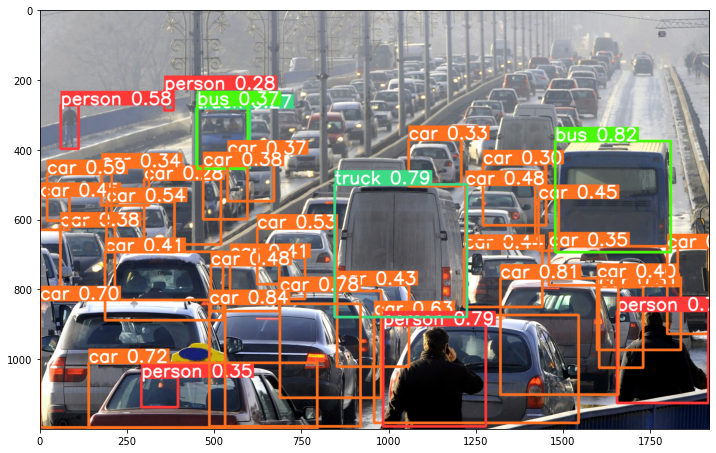

In [12]:
%matplotlib inline
plt.figure(figsize=(12,8))
plt.imshow(np.squeeze(results.render()))
plt.show()

In [13]:
cap=cv2.VideoCapture(0)
while cap.isOpened():
    rect,frame=cap.read()
    results=model(frame)
    
    cv2.imshow("YOLOV",np.squeeze(results.render()))
    if cv2.waitKey(10)& 0xFF==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
    

#Training from scrach

In [2]:
import uuid #unique identifier
import os
import time


In [17]:
IMAGE_PATH=os.path.join("data","images")
labels=["badge","sans"]
number_img=20

In [20]:
cap=cv2.VideoCapture(0)
for label in labels:
  print(f"collection of data: {label}")
  time.sleep(5)
  for nb in range(number_img):
    print(f"collection of data: {label} and number {nb}")

    rect,frame=cap.read()
    imgname=os.path.join(IMAGE_PATH,label+'.'+str(uuid.uuid1())+".jpg")
    cv2.imwrite(imgname,frame)
    cv2.imshow("detection",frame)
    time.sleep(2)
    if cv2.waitKey(10)& 0xFF==ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

collection of data: badge
collection of data: badge and number 0
collection of data: badge and number 1
collection of data: badge and number 2
collection of data: badge and number 3
collection of data: badge and number 4
collection of data: badge and number 5
collection of data: badge and number 6
collection of data: badge and number 7
collection of data: badge and number 8
collection of data: badge and number 9
collection of data: badge and number 10
collection of data: badge and number 11
collection of data: badge and number 12
collection of data: badge and number 13
collection of data: badge and number 14
collection of data: badge and number 15
collection of data: badge and number 16
collection of data: badge and number 17
collection of data: badge and number 18
collection of data: badge and number 19
collection of data: sans
collection of data: sans and number 0
collection of data: sans and number 1
collection of data: sans and number 2
collection of data: sans and number 3
collect

In [ ]:
for label in labels:
  print(f"collection of data: {label}")
  time.sleep(5)
  for nb in range(number_img):
    print(f"collection of data: {label} and number {nb}")
    imgname=os.path.join(IMAGE_PATH,label+'.'+str(uuid.uuid1())+".jpg")
    print(imgname)


In [21]:
!git clone https://github.com/tzutalin/labelImg.git

Cloning into 'labelImg'...


In [22]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.3
    Uninstalling lxml-4.6.3:
      Successfully uninstalled lxml-4.6.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
spyder 5.1.5 requires pyqt5<5.13, but you have pyqt5 5.15.6 which is incompatible.


In [24]:
pwd

'C:\\Users\\a846864\\Documents\\solution_objection\\yolov5'

In [25]:
!python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

^C


In [10]:
cd yolov5

C:\Users\a846864\Documents\solution_objection\yolov5


In [11]:
pwd

'C:\\Users\\a846864\\Documents\\solution_objection\\yolov5'

In [12]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

URLError: <urlopen error [WinError 10060] Une tentative de connexion a échoué car le parti connecté n’a pas répondu convenablement au-delà d’une certaine durée ou une connexion établie a échoué car l’hôte de connexion n’a pas répondu>

In [ ]:
img = os.path.join('data', 'images', 'badge.f63eede3-ddce-11ec-8529-145afc321308.jpg')

In [ ]:
results = model(img)

In [ ]:
results.print()

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [5]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()